# Projet sur dataset des applications de Google Play

## Introduction

Bienvenue dans ce carnet d'analyse exploratoire de données portant sur un ensemble de données d'applications Google Play. Notre objectif est d'explorer la relation entre les avis et les sentiments des utilisateurs pour chaque application. Pour ce faire, nous allons examiner les caractéristiques de chaque application, telles que le nombre de téléchargements, la taille de l'application, la catégorie, la version Android requise, etc., et analyser comment ces caractéristiques influencent les avis et les sentiments des utilisateurs. Nous espérons que cette analyse vous fournira des informations utiles sur les préférences et les comportements des utilisateurs de Google Play et vous aidera à mieux comprendre les facteurs qui influencent les avis et les sentiments des utilisateurs.

## Description des données

In [ ]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import datetime as dt

import seaborn as sns



### Premiére DataSet

In [ ]:
apps=pd.read_csv('googleplaystore.csv')
apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
apps.shape

(10841, 13)

In [ ]:
apps.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [ ]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
apps.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

### Deuxiéme Dataset

In [ ]:
apps_rev=pd.read_csv("googleplaystore_user_reviews.csv")
apps_rev.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [ ]:
apps_rev.shape

(64295, 5)

In [ ]:
apps_rev.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

In [ ]:
apps_rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [ ]:
apps_rev.dtypes

App                        object
Translated_Review          object
Sentiment                  object
Sentiment_Polarity        float64
Sentiment_Subjectivity    float64
dtype: object

## Analyse exploratoire des données 

### Descriptif statistique

#### Premiére DataSet

In [ ]:
apps.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [ ]:
apps.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

#### Deuxiéme DataSet

In [ ]:
apps_rev.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


### Traitement des données manquantes 

### Premiére dataset 

### Deuxiéme dataset

In [ ]:
apps_rev.isna().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [ ]:
apps_rev=apps_rev.dropna(thresh=2)

### Élimination des valeurs aberrantes

#### Premiére Dataset

Suppression de 10472 en raison d'une incompatibilité de données dans la colonne

In [ ]:
apps.loc[10472]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              1.9
Rating                                               19.0
Reviews                                              3.0M
Size                                               1,000+
Installs                                             Free
Type                                                    0
Price                                            Everyone
Content Rating                                        NaN
Genres                                  February 11, 2018
Last Updated                                       1.0.19
Current Ver                                    4.0 and up
Android Ver                                           NaN
Name: 10472, dtype: object

In [ ]:
apps=apps.drop(index=10472)

In [ ]:
apps['App']=apps['App'].str.lower()
apps['App']=apps['App'].str.capitalize()

In [ ]:
apps['App'].value_counts()

Roblox                                               9
Cbs sports app - scores, news, stats & watch live    8
Candy crush saga                                     7
Duolingo: learn languages free                       7
8 ball pool                                          7
                                                    ..
U+box                                                1
U assist - screen mirroring & sharing app            1
What u see                                           1
[verify-u] videoident                                1
Ihoroscope - 2018 daily horoscope & astrology        1
Name: App, Length: 9638, dtype: int64

In [ ]:
apps=apps.drop_duplicates(subset=['App'])

In [ ]:
apps['App'].value_counts()

Photo editor & candy camera & grid & scrapbook    1
Infamy ro                                         1
Ck coif                                           1
Contract killer: zombies                          1
Ck shop                                           1
                                                 ..
D day world war ii commando survival shooting     1
Geometry dash meltdown                            1
Koi live wallpaper                                1
Kinemaster – pro video editor                     1
Ihoroscope - 2018 daily horoscope & astrology     1
Name: App, Length: 9638, dtype: int64

Suppression du "+" des valeurs du nombre d'installations et conversion en numérique

In [ ]:
apps['Installs'] = apps['Installs'].str.replace('+', '')
apps["Installs"] = apps["Installs"].str.replace(".", "")
apps["Installs"] = apps["Installs"].str.replace(",", "")

apps['Installs'].unique()

<ipython-input-395-43dfb89912c8>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  apps['Installs'] = apps['Installs'].str.replace('+', '')
<ipython-input-395-43dfb89912c8>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  apps["Installs"] = apps["Installs"].str.replace(".", "")


array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '50', '100', '500', '10', '1', '5', '0'], dtype=object)

In [ ]:
apps['Installs'] = apps['Installs'].astype(int,errors='ignore')
apps['Installs']


0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10836        5000
10837         100
10838        1000
10839        1000
10840    10000000
Name: Installs, Length: 9638, dtype: int64

Suppression de '$' des valeurs de Price et conversion en numérique[link text

In [ ]:
apps['Price'] = apps['Price'].str.replace('\$', '', regex=True)
apps['Price']=apps['Price'].astype(float)

Suppression de 'M' et 'k' des valeurs de Size et conversion en numérique

In [ ]:
apps['Size'] = apps['Size'].astype(str).str.replace('Varies with device', '', regex=True)

apps['Size'] = apps['Size'].str.replace('.', '', regex=True)

apps['Size'] = apps['Size'].str.replace('M', '.000', regex=True)

apps['Size'] = apps['Size'].str.replace('k', '.000.000', regex=True)

apps['Size'] = pd.to_numeric(apps['Size'], errors='coerce')


In [ ]:
apps['Reviews']=apps['Reviews'].astype(float)

In [ ]:
apps.dtypes

App                object
Category           object
Rating            float64
Reviews           float64
Size              float64
Installs            int64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

#### Data merging

In [ ]:
ar=apps.merge(apps_rev,on='App')

In [ ]:
ar.Sentiment.value_counts(normalize=True)

Positive    0.604233
Negative    0.260744
Neutral     0.135022
Name: Sentiment, dtype: float64

### Visualisation des données

#### Combien d'applications dans chaque catégorie ?

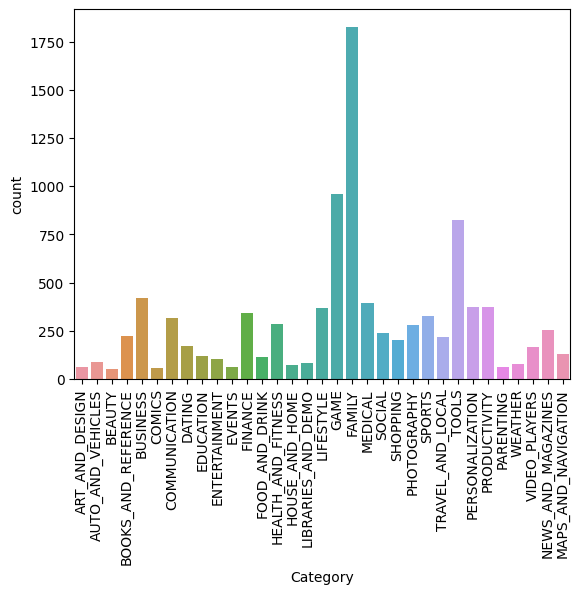

In [ ]:
sns.countplot(x="Category",data=apps)
plt.xticks(rotation=90)
plt.show()

--> la categorie Game qui contient les plus d'application

#### Comment varie le prix en relation avec "content rating" ?

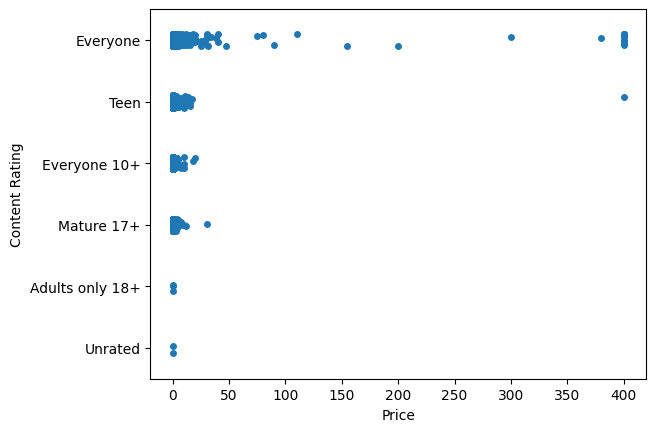

In [ ]:
sns.stripplot(data=apps, x='Price',y='Content Rating')
plt.show()

#### Comment pouvons-nous efficacement élaborer des stratégies pour déterminer la taille et le prix de notre application ?



*   Est-ce que la taille d'une application affecte sa note ?
*   Est-ce que le prix d'une application affecte son évaluation ?



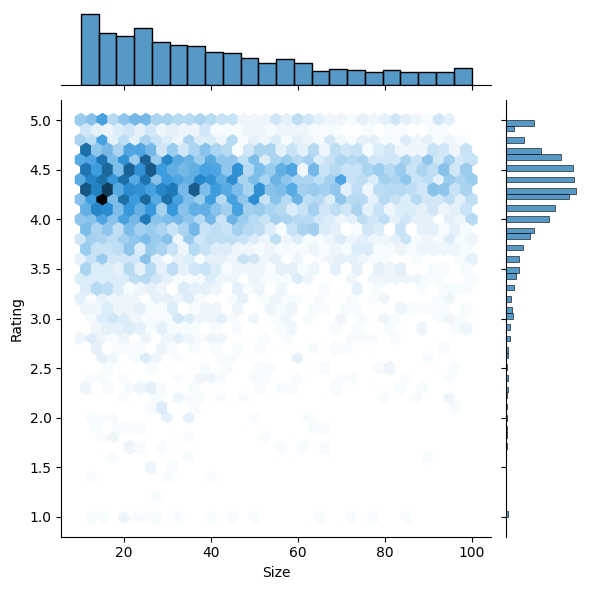

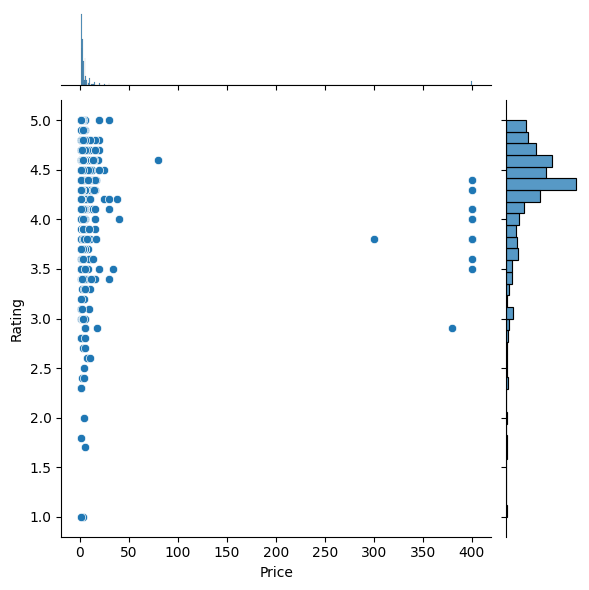

In [ ]:
large_categories = apps.groupby('Category').filter(lambda x: len(x) >= 250).reset_index()

plt1 = sns.jointplot(x = large_categories['Size'], y = large_categories['Rating'], kind = 'hex')

paid_apps = apps[apps['Type'] == 'Paid']

plt2 = sns.jointplot(x = paid_apps['Price'], y = paid_apps['Rating'])

#### Vue global de l'évaluation des applications


<ipython-input-412-f0d371adae3a>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g = sns.distplot(apps.Rating, hist=False, color="g", kde_kws={"shade": True})
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2511: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


Text(0.5, 1.0, 'Distribution of App Ratings')

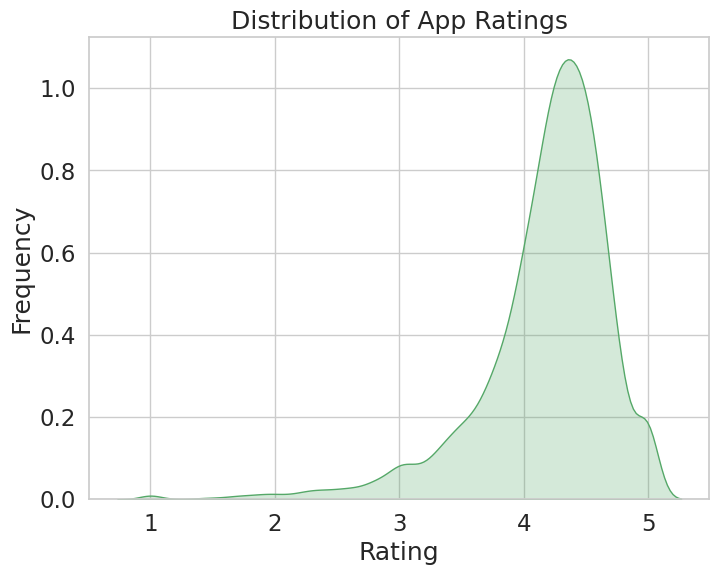

In [ ]:

sns.set(font_scale=1.5, style = "whitegrid") 
f, axes = plt.subplots(figsize=(8,6), sharex=True) 

g = sns.distplot(apps.Rating, hist=False, color="g", kde_kws={"shade": True})
plt.ylabel("Frequency")
plt.title("Distribution of App Ratings")

#### Est-ce que la date de la dernière mise à jour a un effet sur la note ?

0     January 7, 2018
1    January 15, 2018
2      August 1, 2018
3        June 8, 2018
4       June 20, 2018
Name: Last Updated, dtype: object


Text(0.5, 1.0, 'Update Year VS Rating')

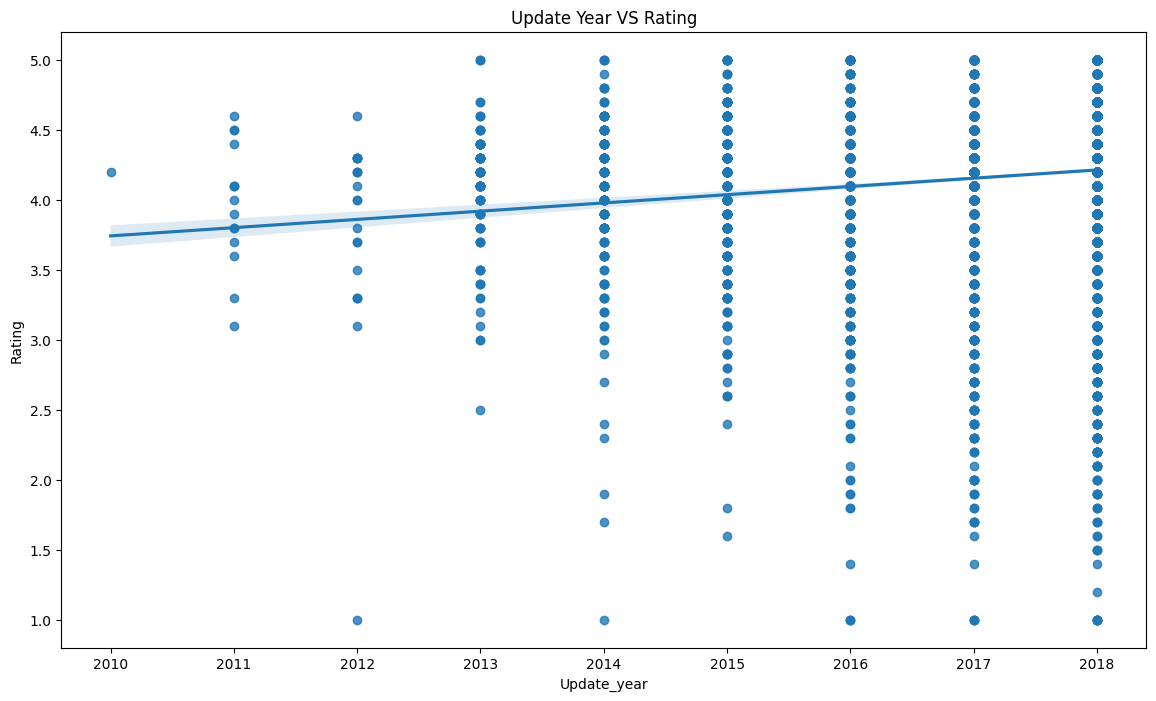

In [ ]:
from datetime import datetime as dt

print(apps['Last Updated'].head())

apps["Update_date"] = apps['Last Updated'].apply(lambda x: dt.strptime(x, '%B %d, %Y').date()) 

apps["Update_year"] = apps["Update_date"].apply(lambda x: x.strftime('%Y')).astype('int64') 

fig, ax = plt.subplots(figsize=(14,8))
sns.regplot(x="Update_year", y="Rating", data=apps)
plt.title("Update Year VS Rating")


Les applications qui ont des mis à jours récents ont plus de chance d'avoir des hauts évaluations .

#### Les sentiments

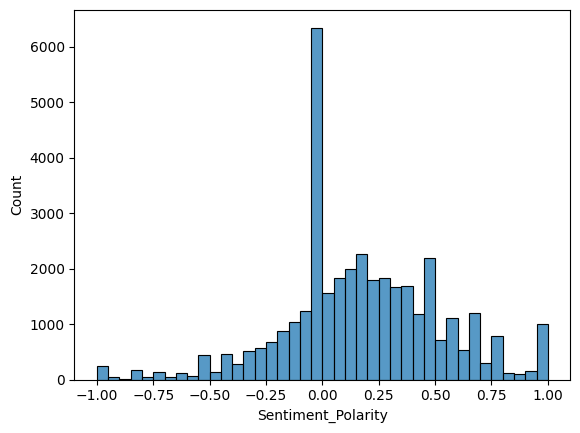

In [ ]:
sns.histplot(data=apps_rev, x="Sentiment_Polarity", binwidth=.05)
plt.show()

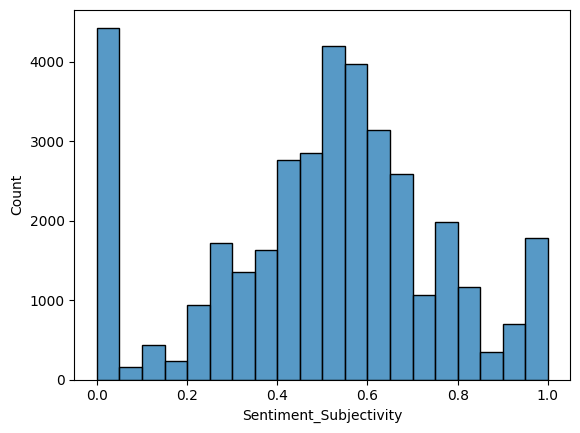

In [ ]:
sns.histplot(data=apps_rev, x="Sentiment_Subjectivity", binwidth=.05)
plt.show()

#####Quelle est la distribution des types d'avis dans l'ensemble de données ?

<Axes: title={'center': 'Number of installs type wise according to Genres'}, xlabel='Category', ylabel='log_sentiment_count'>

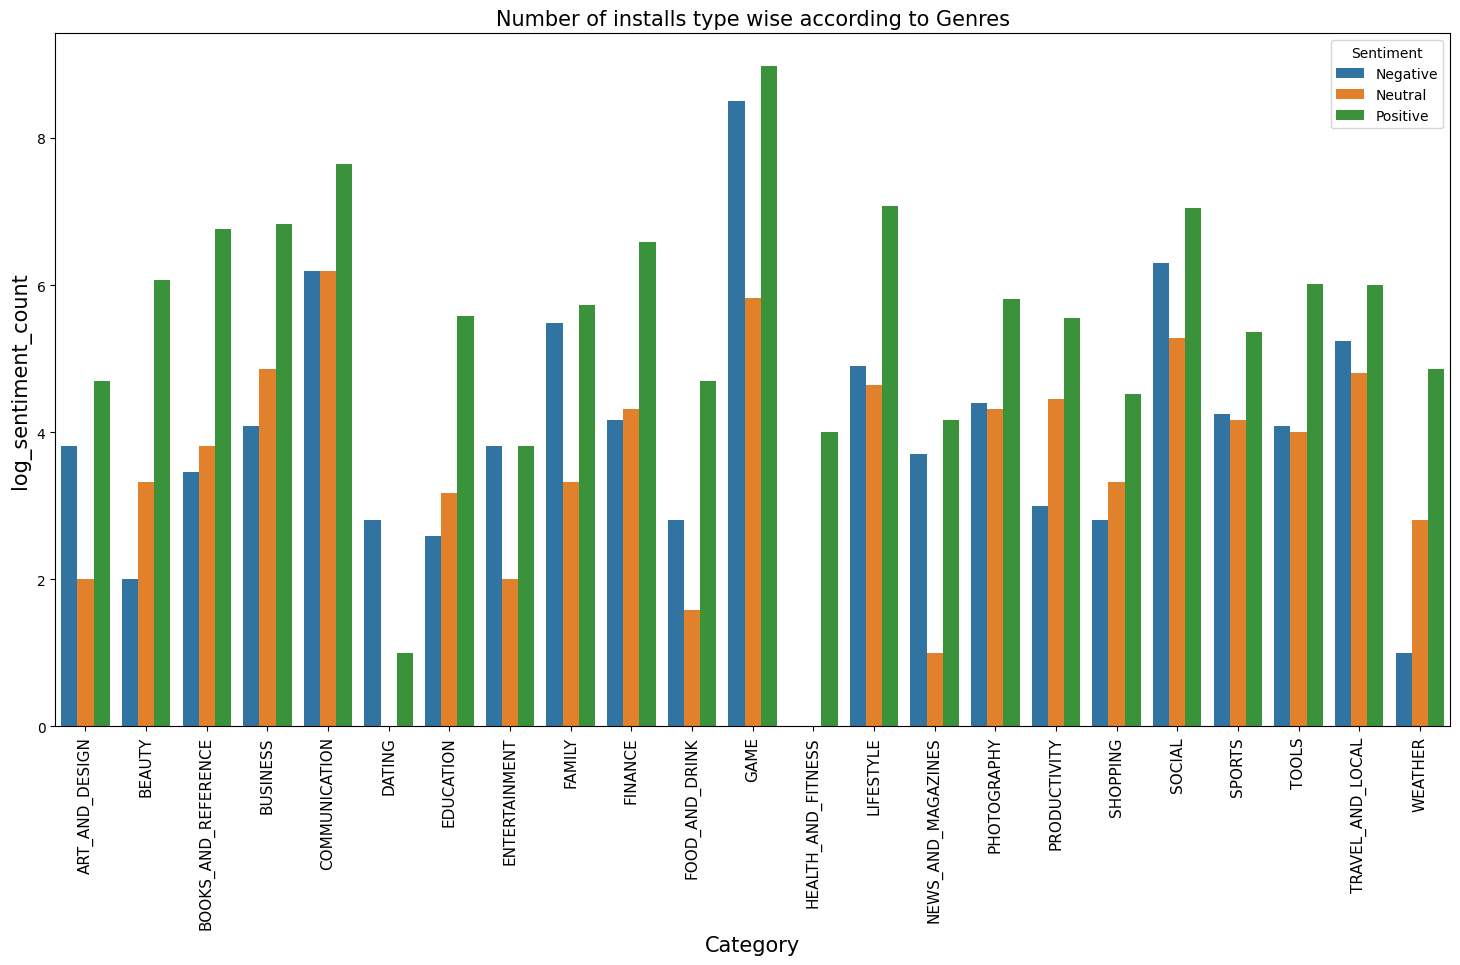

In [ ]:
category_sentiment = ar.groupby(['Category','Sentiment']).size().reset_index(name='Sentiment Count')
category_sentiment['log_sentiment_count'] = np.log2(category_sentiment['Sentiment Count'])
plt.figure(figsize=(18,9))
plt.xticks(rotation=90,fontsize=11)
plt.xlabel("Category", fontsize=15)
plt.ylabel("Installs", fontsize=15)
plt.title("Number of installs type wise according to Genres",fontsize=15)
sns.barplot(x='Category', y='log_sentiment_count', hue='Sentiment', data=category_sentiment)

##### Est-ce que la subjectivité du sentiment est proportionnelle à la polarité du sentiment ?

<ipython-input-409-025ca8d4ae03>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sentimet_subjectivity_polarity = ar.groupby(['Category'])['Sentiment_Polarity','Sentiment_Subjectivity'].mean().reset_index().rename(columns={'Sentiment_Polarity':'Sentiment_polarity_avg','Sentiment_Subjectivity':'sentiment_subjectivity_avg'})


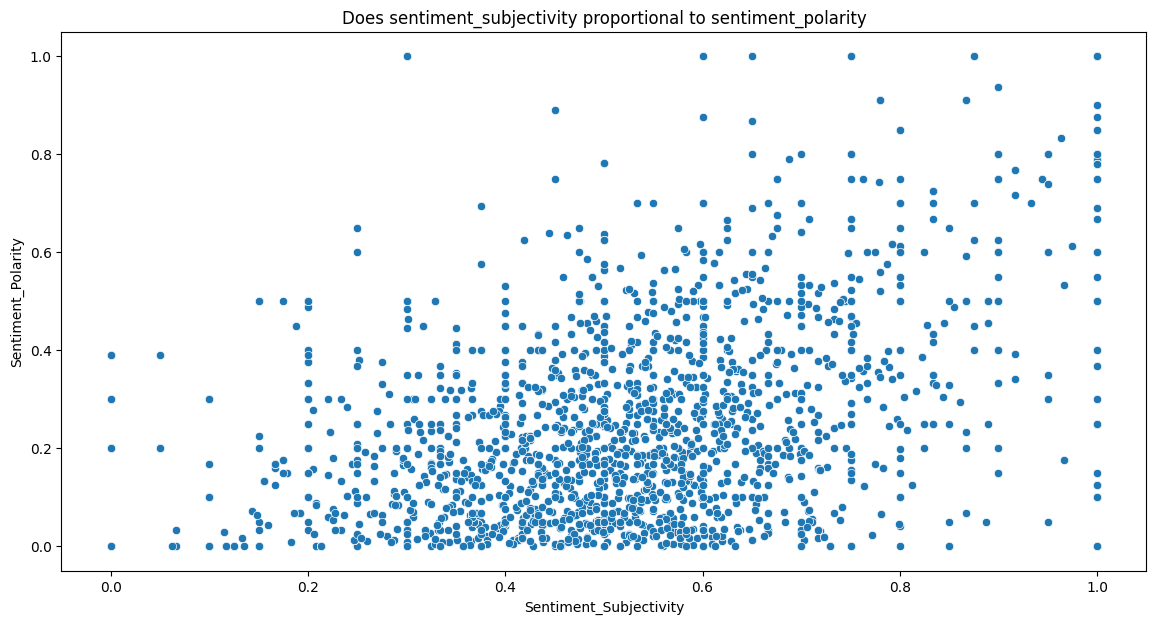

In [ ]:
sentimet_subjectivity_polarity = ar.groupby(['Category'])['Sentiment_Polarity','Sentiment_Subjectivity'].mean().reset_index().rename(columns={'Sentiment_Polarity':'Sentiment_polarity_avg','Sentiment_Subjectivity':'sentiment_subjectivity_avg'})
ar['Sentiment_Subjectivity'] = ar['Sentiment_Subjectivity'].abs()
ar['Sentiment_Polarity'] = ar['Sentiment_Polarity'].abs()
plt.figure(figsize=(14,7))
sns.scatterplot(x=ar['Sentiment_Subjectivity'], y=ar['Sentiment_Polarity'])
plt.title("Does sentiment_subjectivity proportional to sentiment_polarity")
plt.show()

À partir du graphique de dispersion ci-dessus, on peut conclure que la subjectivité du sentiment n'est pas toujours proportionnelle à la polarité du sentiment, mais dans la plupart des cas, elle montre un comportement proportionnel, lorsque la variance est trop élevée ou trop faible.

### Corrélation

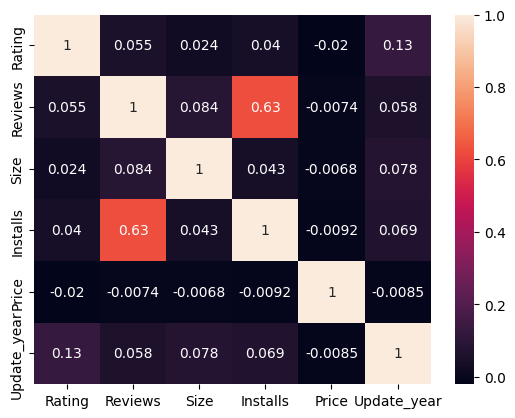

In [ ]:
sns.heatmap(apps.corr(), annot=True)
plt.show()

Il y'en a une forte correlation entre le nombre des installations et les évaluations

## Conclusions

En conclusion, cette analyse exploratoire de données nous a permis de mieux comprendre la relation entre les avis et les sentiments des utilisateurs pour les applications Google Play. Nous avons constaté que certaines caractéristiques, telles que le nombre de téléchargements,et la catégorie ont une influence significative sur les avis et les sentiments des utilisateurs. Nous avons également observé des tendances intéressantes en ce qui concerne les catégories les plus populaires. Ces informations pourraient être utiles pour les développeurs d'applications et les spécialistes du marketing pour améliorer la qualité des applications et mieux comprendre les préférences des utilisateurs. Enfin, il convient de noter que cette analyse est basée sur un ensemble de données limité et que des recherches supplémentaires pourraient être nécessaires pour une compréhension plus approfondie des facteurs influençant les avis et les sentiments des utilisateurs.

## Bibliographie 



*   https://www.analyticsvidhya.com/blog/2022/07/step-by-step-exploratory-data-analysis-eda-using-python/
*   https://jovian.com/learn/data-analysis-and-visualization-with-python

